In [1]:
%matplotlib inline

In [2]:
import os
from astropy.table import Table 

def load_sdss_colors_sample_value_added():
    """
    """
    dirname = "/Users/aphearin/work/sdss/umachine_colors_sdss_catalog"
    basename = "dr10_mgs_colors_value_added.hdf5"
    fname = os.path.join(dirname, basename)

    return Table.read(fname, path='data')
sdss = load_sdss_colors_sample_value_added()
sdss = sdss[sdss['rmag'] > -900]
sdss = sdss[sdss['sdss_petrosian_gr'] > -1]
sdss = sdss[sdss['sdss_petrosian_gr'] < 2]
sdss = sdss[sdss['sdss_petrosian_ri'] > -1]
sdss = sdss[sdss['sdss_petrosian_ri'] < 1.5]
print(sdss.keys())

['ra', 'dec', 'z', 'sm', 'ssfr', 'nd', 'rmag', 'sdss_petrosian_gr', 'sdss_petrosian_ri', 'size_kpc', 'dr7_photoobj_id', 'ssfr_percentile_fixed_sm']


In [3]:
from rescale_dc2.generate_fake_sdss_data import monte_carlo_mock_sdss_data_faint_end

ngals_mock = int(1e4)
sdss_mask = (sdss['sm'] < 10) & (sdss['z'] < 0.02)
data_gr = sdss['sdss_petrosian_gr'][sdss_mask]
data_ri = sdss['sdss_petrosian_ri'][sdss_mask]
data_AbsMagr = sdss['rmag'][sdss_mask]
data_log10_mstar = sdss['sm'][sdss_mask]

mock = monte_carlo_mock_sdss_data_faint_end(ngals_mock, data_gr, data_ri, data_log10_mstar,
            data_AbsMagr)
print(mock.keys())

['gr', 'ri', 'sm', 'magr']


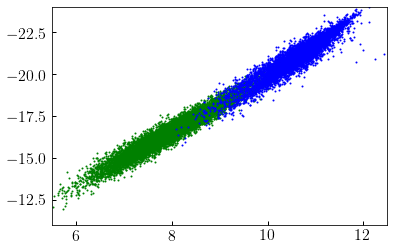

In [4]:
fig, ax = plt.subplots(1, 1)

xlim = ax.set_xlim(5.5, 12.5)
ylim = ax.set_ylim(-11, -24)

nskip = 20
__=ax.scatter(mock['sm'], mock['magr'], s=1, color='green')
__=ax.scatter(sdss['sm'][::nskip], sdss['rmag'][::nskip], s=1, color='blue')


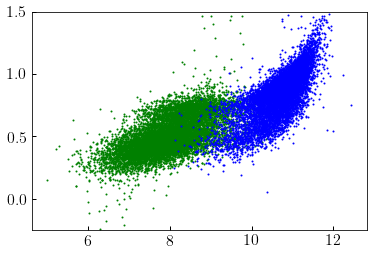

In [5]:
fig, ax = plt.subplots(1, 1)

# xlim = ax.set_xlim(5.5, 12.5)
ylim = ax.set_ylim(-0.25, 1.5)

nskip = 20
__=ax.scatter(mock['sm'], mock['gr'], s=1, color='green')
__=ax.scatter(sdss['sm'][::nskip], sdss['sdss_petrosian_gr'][::nskip], s=1, color='blue')


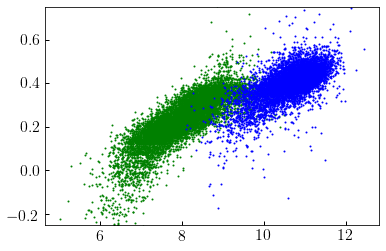

In [6]:
fig, ax = plt.subplots(1, 1)

# xlim = ax.set_xlim(5.5, 12.5)
ylim = ax.set_ylim(-0.25, 0.75)

nskip = 20
__=ax.scatter(mock['sm'], mock['ri'], s=1, color='green')
__=ax.scatter(sdss['sm'][::nskip], sdss['sdss_petrosian_ri'][::nskip], s=1, color='blue')


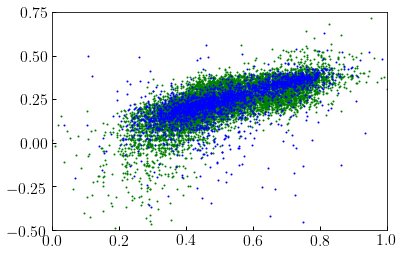

In [7]:
fig, ax = plt.subplots(1, 1)

xlim = ax.set_xlim(0, 1)
ylim = ax.set_ylim(-0.5, 0.75)
sdss_mask = (sdss['sm'] < 10) & (sdss['z'] < 0.02)

nskip = 20
__=ax.scatter(mock['gr'], mock['ri'], s=1, color='green')
__=ax.scatter(sdss['sdss_petrosian_gr'][sdss_mask], sdss['sdss_petrosian_ri'][sdss_mask], s=1, color='blue')


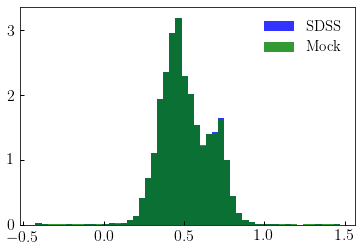

In [8]:
fig, ax = plt.subplots(1, 1)

__=ax.hist(sdss['sdss_petrosian_gr'][sdss_mask], color='blue', alpha=0.8, 
          bins=50, label=r'${\rm SDSS}$', normed=True)

__=ax.hist(mock['gr'], color='green', alpha=0.8, 
          bins=50, label=r'${\rm Mock}$', normed=True)

legend = ax.legend()

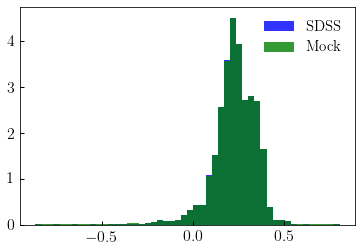

In [9]:
fig, ax = plt.subplots(1, 1)

__=ax.hist(sdss['sdss_petrosian_ri'][sdss_mask], color='blue', alpha=0.8, 
          bins=50, label=r'${\rm SDSS}$', normed=True)

__=ax.hist(mock['ri'], color='green', alpha=0.8, 
          bins=50, label=r'${\rm Mock}$', normed=True)

legend = ax.legend()